## Energy Bar Charts:

### ENGR 212

##### Why?

Energy bar charts are core tool for visualizing work-energy problems. It would be lovely to have a tool that is interactive AND provides an effective tool for both problem solving as well as teaching. That's what this is attempting. Static first!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Setting Up the Bar Graph

My starting plan is 4 bars for the begining, 4 for the end, 2 for the transition, and two dividing lines. This is 12 locations for objects to be plotted.

[matplotlib.pyplot.bar documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)

[numpy.arange() documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

I like the visual look of the width argument being .4. Default is apparently 0.8

Then I need to generate the labels for the bars. I'm going to define them individually and then assemble them into the list of the current 12

In [3]:
# set up locations for bars and other objects
# start with how many of each bar
initialBars = 4
transBars = 2
finalBars = initialBars

# total number of bars + 2 for vertical dividers +1 for net energy at end +1 extra
N = initialBars + transBars + finalBars + 2 + 1 +1
locate = np.arange(N) 

# shifted locations for labels
locateShift = locate - 0.4

# the x locations for the groups
initialLoc = locate[0:initialBars]
transLoc = locate[initialBars+1: initialBars + transBars +1]
finalLoc = locate[N-(finalBars + 2):N-2]
vlineLoc = [initialBars, (initialBars + transBars +1)]
netLoc = locate[N-1]

print(initialLoc)
print(finalLoc)

# Structure bar width - this is a proportional value apparently
# it scales with plot figure size.
width = 0.4

# bar labels
labelKEi = 'KE' # initial 
labelPEgi = 'PEg' # initial 
labelPEsi = 'PEs' # initial 
labelUKi = 'U_other' # unknown source of energy initial
vertBar = ' '
labelPM1 = 'W_F1' # unknown source of energy added or lost during process
labelPM2 = 'W_F2' # unknown source of energy added or lost during process
labelKEf = 'KE' # final
labelPEgf = 'PEg' # final
labelPEsf = 'PEs' # final
labelUKf = 'U_other' # unknown source of energy final
labelNet = 'net = 0' # does everything add up?
labelLast = ' '

# break labels into sections to support color coding
initialLabels = [labelKEi,labelPEgi,labelPEsi,labelUKi]
transLabels = [labelPM1, labelPM2]
finalLabels = [labelKEf,labelPEgf,labelPEsf,labelUKf]
netLabels = [labelNet]
vertLabel = [vertBar]

# put it all together for labels
barLabels = initialLabels + vertLabel + transLabels + vertLabel + finalLabels + vertLabel + netLabels


[0 1 2 3]
[ 8  9 10 11]


### Data Value for Starters

Assign names to each of the data points for the bar heights. It is hoped that this will ease the link to interactive widgets for some future version of this tool


In [4]:
# These match up with labels from the earlier cell.
# this is the actual data
KEi = 1. # initial KE
PEgi = 2.5 # initial gravitational
PEsi = .0 # initial spring
UKi = 0. # unknown source of energy initial
PM1 = +2 # unknown source of energy added or lost during process
PM2 = -.0 # unknown source of energy added or lost during process
KEf = 0.0 # final
PEgf = 3 # final
PEsf = 0 # final
UKf = 0. # unknown source of energy final

# Calculate net energy in the listed bars
netEnergy = KEi + PEgi + PEsi + UKi + PM1 + PM2 +KEf + PEgf + PEsf + UKf

# The whole list -- nmay keep this around or maybe not.
barHeights = [KEi, PEgi, PEsi, UKi, 0., PM1, PM2, 0., KEf, PEgf, PEsf, UKf, netEnergy]
energyMax = np.max(barHeights)
energyMin = np.min(barHeights)


# Separate the different parts of the plot so I can assign different colors
initialHeights = [KEi, PEgi, PEsi, UKi]
transHeights = [PM1, PM2]
finalHeights = [ KEf, PEgf, PEsf, UKf]
netHeights = [netEnergy]

### Bar Graph

So much to describe here that I haven't documented yet. .... stay tuned!!

[pyplot.bar documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)


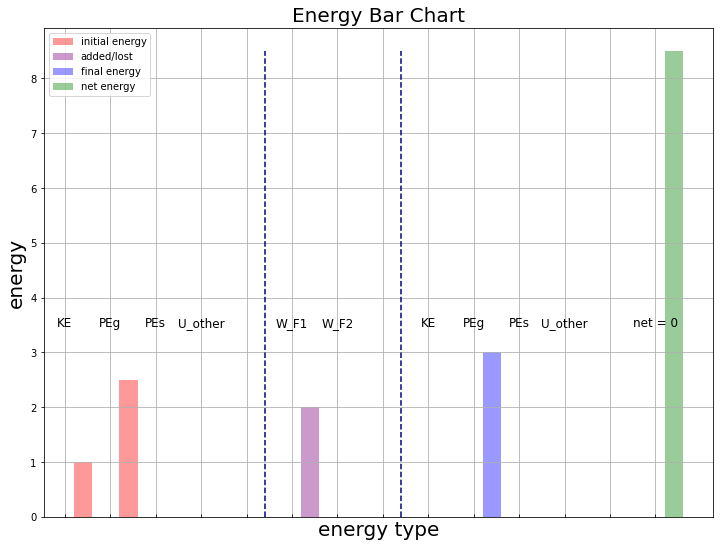

In [5]:
fig1, ax1 = plt.subplots()

# bar graph sections
ax1.bar(initialLoc, 
        initialHeights, 
        width,
        color = 'red',
        label= 'initial energy',
        alpha = 0.4)
ax1.bar(transLoc, 
        transHeights, 
        width,
        color = 'purple',
        label= 'added/lost',
        alpha = 0.4)
ax1.bar(finalLoc, 
        finalHeights, 
        width,
        color = 'blue',
        label= 'final energy',
        alpha = 0.4)
ax1.bar(netLoc, 
        netHeights, 
        width,
        color = 'green',
        label= 'net energy',
        alpha = 0.4)


# dividing lines
ax1.vlines(vlineLoc, energyMin, energyMax, linestyles= 'dashed', color = 'navy')

# turn on plot grid
ax1.grid()

# labeling stuff
# plt.text([1.,2.],[0.5,0.5],[labelKEi,labelPEgi])
ax1.tick_params(axis="x",direction="in", pad=-200)
plt.xticks(locateShift, barLabels, fontsize = 12)


plt.xlabel('energy type', fontsize = 20)
plt.ylabel('energy', fontsize = 20)
plt.title('Energy Bar Chart', fontsize = 20)
# plt.xticks(locate, barLabels)
#plt.yticks(np.arange(0, 81, 10))
plt.legend()
# Set the size of my plot for better visibility
fig1.set_size_inches(12, 9)

#fig.savefig("myplot.png")
plt.show()